In [1]:
import pandas as pd
import numpy as np


Load the dataset

In [4]:
data = pd.read_csv('PlayTennis.csv')
print(data.head())


    outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes


b. Use Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features into numeric
label_encoder = LabelEncoder()

for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

print(data.head())  # Check the encoded data


   outlook  temp  humidity  windy  play
0        2     1         0      0     0
1        2     1         0      1     0
2        0     1         0      0     1
3        1     2         0      0     1
4        1     0         1      0     1


c. Create a Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (the last column)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')  # Using 'entropy' for ID3 algorithm
clf.fit(X_train, y_train)

# Test the classifier
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


d. Visualize the Tree

In [7]:
# This code will create tree and store in new pdf formate name decision_tree


# from sklearn.tree import export_graphviz
# import graphviz

# # Export the tree to a DOT format
# dot_data = export_graphviz(clf, out_file=None,
#                            feature_names=X.columns,
#                            class_names=label_encoder.classes_,
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Visualize the tree
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # Save as a file (optional)
# graph.view()  # View in your default viewer


'decision_tree.pdf'

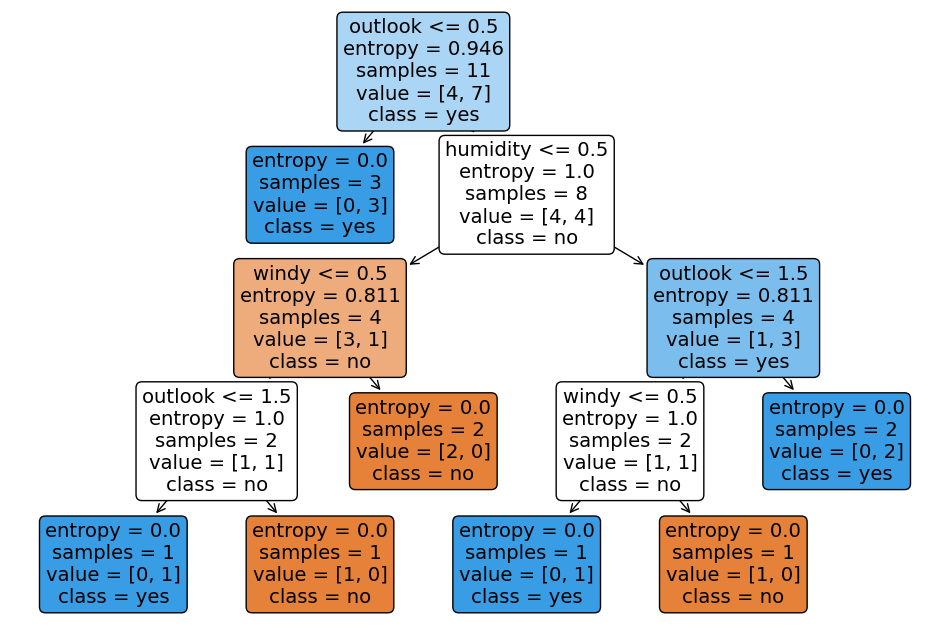

In [8]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True, rounded=True)
plt.show()
